# Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Load the PCA-transformed data
pca_df = pd.read_pickle('../data/pca_df.pkl')

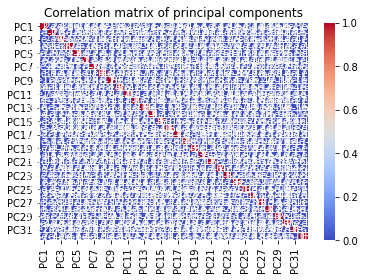

In [3]:
# Plot correlation matrix of principal components
corr_matrix = pca_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of principal components')
plt.show()

### KMeans

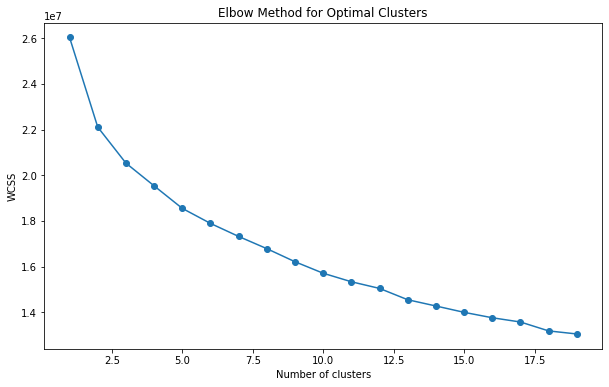

In [12]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
# Helper function to get Betweenss 
def get_betweenss(data, cluster_model):
    betweenss = 0
    mean = data.mean()
    for i in np.arange(len(data)):
        betweenss += np.sum((cluster_model.cluster_centers_[cluster_model.labels_[i]]-mean)**2)
    return betweenss

In [21]:
# Calculate separation. The higher the better. 
def get_separation(data, cluster_model):
    betweenss = get_betweenss(data, cluster_model)
    withinss = cluster_model.inertia_
    return betweenss/(betweenss + withinss)

In [22]:
# Calculate cohesion. The lower the better.
def get_cohesion(data, cluster_model):
    betweenss = get_betweenss(data, cluster_model)
    withinss = cluster_model.inertia_
    return withinss/(betweenss + withinss)

In [25]:
# Visualize cohesion and separation
# cohesion = []
# separation = []

# for i in range(2, 3):
#     kmeans = KMeans(n_clusters=i, random_state=42)
#     kmeans.fit(pca_df)
#     cohesion.append(get_cohesion(pca_df, kmeans))
#     separation.append(get_separation(pca_df, kmeans))

# plt.figure(figsize=(10, 6))
# plt.plot(range(2, 3), [cohesion, separation], marker='o')
# plt.title('Visualize Cohesion and Separation')
# plt.xlabel('Number of clusters')
# plt.ylabel('Cohesion and Separation')
# plt.show()